# Notebook Objective
The aim of this notebook is to explore and understand the data to support the analysis and prediction model training.


# Setting up environment

In [ ]:
# Import libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Barstow, CA

## Import Data

In [ ]:
#Training & Testing Data
barstow2017 = pd.read_csv('/content/data/barstow_2017.csv')
barstow2017_sm = pd.read_csv('/content/data/barstow_sm_2017.csv')

#Validation Data
barstow2022 = pd.read_csv('/content/data/barstow_2022.csv')
barstow2022_sm = pd.read_csv('/content/data/barstow_sm_2022.csv')
barstow2022_lg = pd.read_csv('/content/data/barstow_lg_2022.csv')

In [ ]:
barstow2017

,X,Y,aspect,slope,NDMI,MSAVI,NDVI,EVI,SR_B5,SR_B4,SAVI,SR_B6,MSI,MNDWI,SR_B7,SR_B3,SR_B2,ST_B10,smi
0,478350.0,3845070.0,340,2,0.083173,0.277401,0.389658,0.302484,0.353658,0.155328,0.294846,0.299345,0.846426,-0.379756,0.221822,0.134565,0.086193,311.079090,0.096467
1,478380.0,3845070.0,350,2,0.055669,0.234891,0.334047,0.253876,0.337927,0.168692,0.252183,0.302287,0.894534,-0.359627,0.231310,0.142375,0.091143,311.038074,0.092720
2,478410.0,3845070.0,358,2,0.021076,0.198167,0.293744,0.214680,0.310428,0.169462,0.215787,0.297613,0.958718,-0.356553,0.233648,0.141165,0.091417,311.014148,0.090236
3,478440.0,3845070.0,0,2,0.035707,0.226916,0.326162,0.244199,0.331025,0.168197,0.244431,0.308200,0.931048,-0.374574,0.237278,0.140230,0.089768,311.003894,0.090885
4,478470.0,3845070.0,345,1,0.056343,0.254934,0.355590,0.273777,0.352145,0.167400,0.271805,0.314580,0.893325,-0.379177,0.237003,0.141605,0.089272,311.000476,0.091851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853537,517470.0,3881820.0,103,1,-0.027587,0.120717,0.174625,0.135786,0.300500,0.211152,0.132478,0.317550,1.056739,-0.288575,0.271130,0.175320,0.122987,314.018588,0.080468
1853538,517500.0,3881820.0,101,1,-0.020866,0.128455,0.186961,0.143882,0.300032,0.205515,0.140994,0.312820,1.042620,-0.295401,0.264943,0.170150,0.118780,314.059604,0.080583
1853539,517530.0,3881820.0,101,1,-0.019055,0.126983,0.183992,0.143433,0.301545,0.207825,0.139275,0.313260,1.038850,-0.284497,0.266317,0.174495,0.121997,314.011752,0.078947
1853540,517560.0,3881820.0,102,1,-0.016414,0.128010,0.184885,0.143382,0.303223,0.208595,0.140283,0.313343,1.033375,-0.284691,0.267720,0.174467,0.120650,314.008334,0.079605


## EDA

### Correlation Heatmap

Text(0.5, 1.0, '2022')

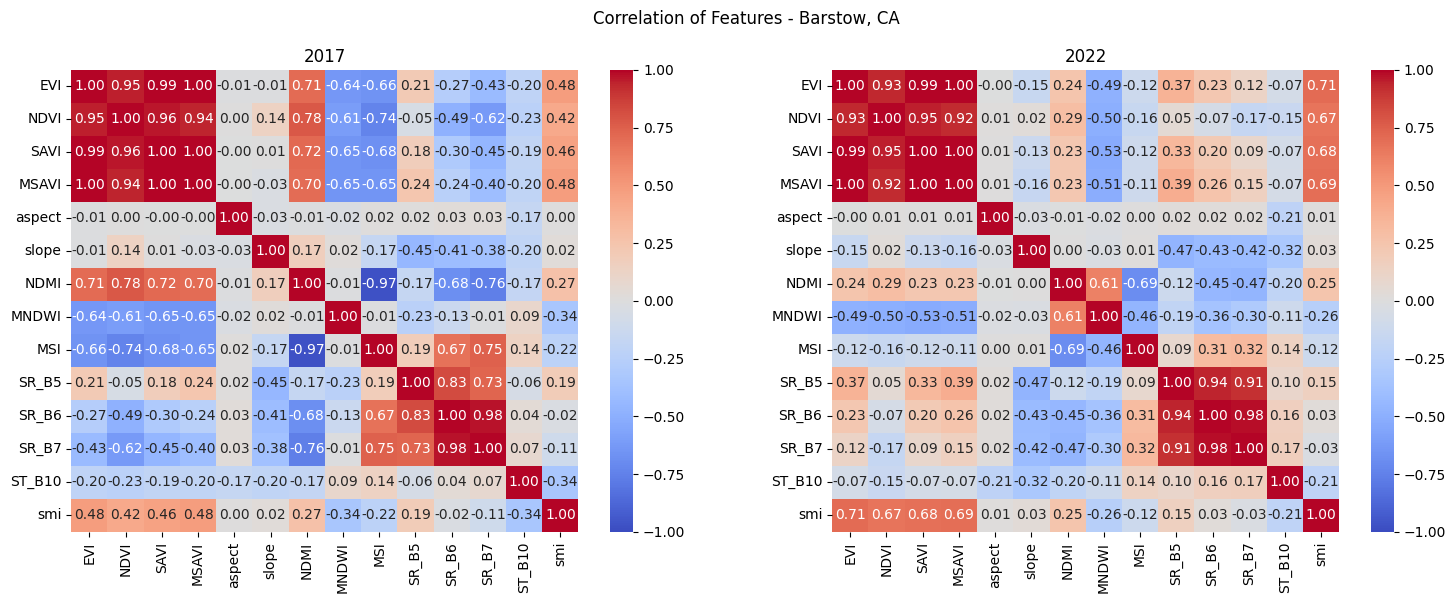

In [ ]:
#look at correlations of the data variables
#from https://sinanthahir.medium.com/experience-analysis-through-weather-data-exploratory-data-analysis-b438ceca8a9b

#features organized by land surface features
features = ['EVI','NDVI','SAVI','MSAVI','aspect','slope','NDMI','MNDWI','MSI','SR_B5','SR_B6','SR_B7','ST_B10','smi']

# assign data correlation matrix - just using original size area to compare the two years
corr = barstow2017[features].corr()
corr22 = barstow2022[features].corr()

#create a figure to view corr for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 6))
fig.suptitle("Correlation of Features - Barstow, CA")

cmap = 'coolwarm'
deci = '.2f'
fontsize = 10

sns.heatmap(data=corr, ax=ax1, annot=True, annot_kws={'fontsize':fontsize}, fmt=deci, cmap = cmap, vmin=-1)
ax1.set_title("2017")

sns.heatmap(data=corr22, ax=ax2, annot=True, annot_kws={'fontsize':fontsize}, fmt=deci, cmap = cmap, vmin=-1)
ax2.set_title("2022")

### Distribution of Feature Values

[Text(0.5, 1.0, 'July 2, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

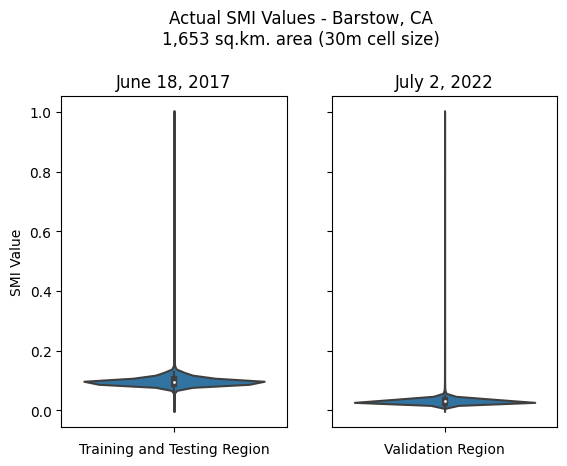

In [ ]:
#Look at distribution of actual output variable (not predicted by model)

#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("Actual SMI Values - Barstow, CA\n1,653 sq.km. area (30m cell size)", y=0.98)

sns.violinplot(data=barstow2017, y='smi', ax=ax1).set(title='June 18, 2017', ylabel = 'SMI Value', xlabel = "Training and Testing Region")


sns.violinplot(data=barstow2022, y='smi', ax=ax2).set(title='July 2, 2022', ylabel = '', xlabel = "Validation Region")


In [ ]:
# Input Features broken into 4 surface factors
#Vegetation Factors
vegfeat = ['EVI','NDVI','SAVI','MSAVI']
#Water Factors
watfeat = ['NDMI','MNDWI','MSI']
#Thermal Factors
thermfeat = ['SR_B5','SR_B6','SR_B7'] #not including BT_10 here due to scaling

[Text(0.5, 1.0, 'March 12, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

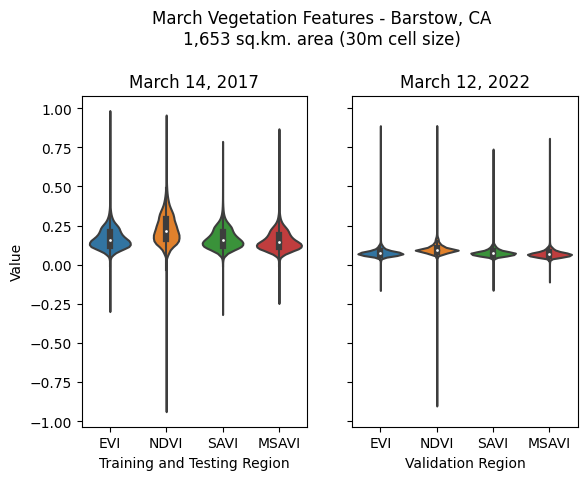

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("March Vegetation Features - Barstow, CA\n1,653 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=barstow2017[vegfeat], ax=ax1).set(title='March 14, 2017', ylabel = 'Value', xlabel = "Training and Testing Region")
#ax1.set_ylim(-1,1)

sns.violinplot(data=barstow2022[vegfeat], ax=ax2).set(title='March 12, 2022', ylabel = '', xlabel = "Validation Region")
#ax2.set_ylim(-1,1)

[Text(0.5, 1.0, 'March 12, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

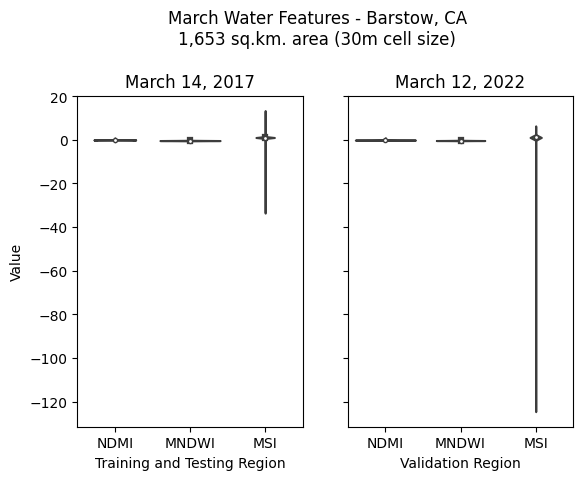

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("March Water Features - Barstow, CA\n1,653 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=barstow2017[watfeat], ax=ax1).set(title='March 14, 2017', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=barstow2022[watfeat], ax=ax2).set(title='March 12, 2022', ylabel = '', xlabel = "Validation Region")


MSI should not be looking like that so below we investigate further.

<Axes: >

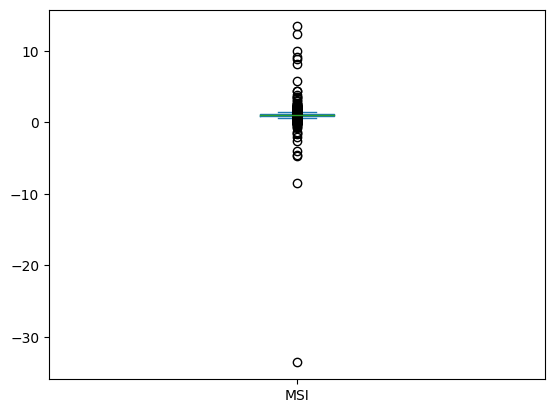

In [ ]:
barstow2017['MSI'].plot(kind ='box')

<Axes: >

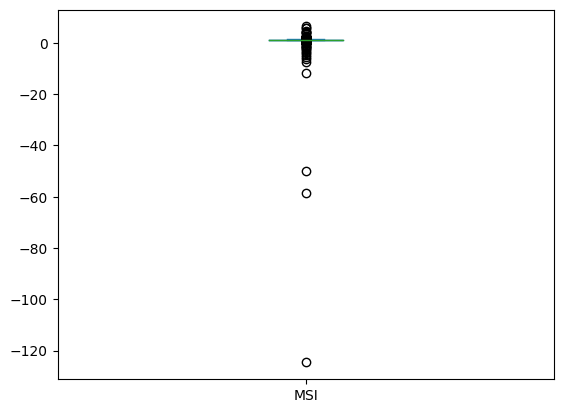

In [ ]:
barstow2022['MSI'].plot(kind ='box')

According to research "The values of this index range from 0 to more than 3. The common range for green vegetation is 0.4 to 2". https://up42.com/marketplace/blocks/processing/msi Our outliers are quite beyond that range in both directions.  The equation given in our main artice of inspiration (https://doi-org.proxy.lib.umich.edu/10.3390/w11040705) for this study do not have the correct bands listed, when you compare to what was said in their source for the equation.  Their source (doi: 10.4172/2469-4134.1000200) does not go into details and there is some confusion as to what wavelengths, bands, and satellites are actually used for the calculation.  The original source (https://doi.org/10.1016/0034-4257(89)90046-1) for the calculation of MSI lists wavelengths that are no longer neatly captured by Landsat 8 and our remote sensing knowledge is not enough to adjust for this.  Therefore, it would be best to drop this feature from our study.

[Text(0.5, 1.0, 'March 12, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

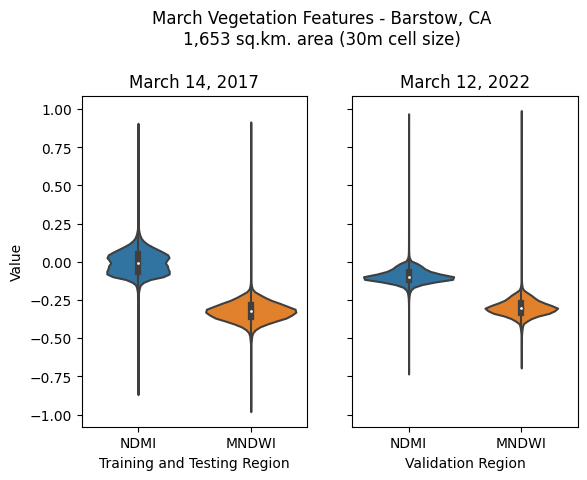

In [ ]:
#update the figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("March Vegetation Features - Barstow, CA\n1,653 sq.km. area (30m cell size)", y=0.98)

sns.violinplot(data=barstow2017[['NDMI', 'MNDWI']], ax=ax1).set(title='March 14, 2017', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=barstow2022[['NDMI', 'MNDWI']], ax=ax2).set(title='March 12, 2022', ylabel = '', xlabel = "Validation Region")

[Text(0.5, 1.0, 'March 12, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

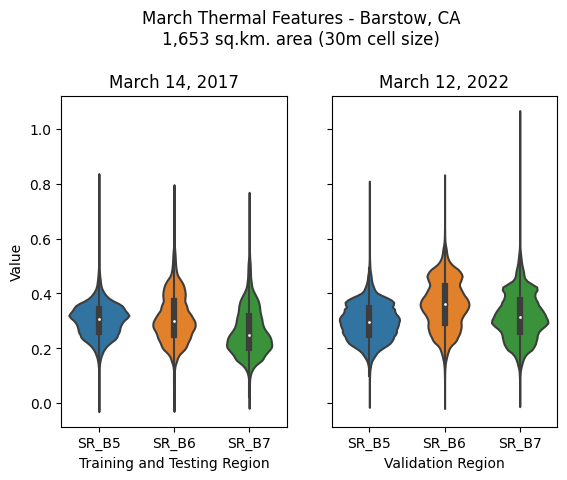

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("March Thermal Features - Barstow, CA\n1,653 sq.km. area (30m cell size)", y=0.98)

sns.violinplot(data=barstow2017[thermfeat], ax=ax1).set(title='March 14, 2017', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=barstow2022[thermfeat], ax=ax2).set(title='March 12, 2022', ylabel = '', xlabel = "Validation Region")

[Text(0.5, 1.0, 'March 12, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

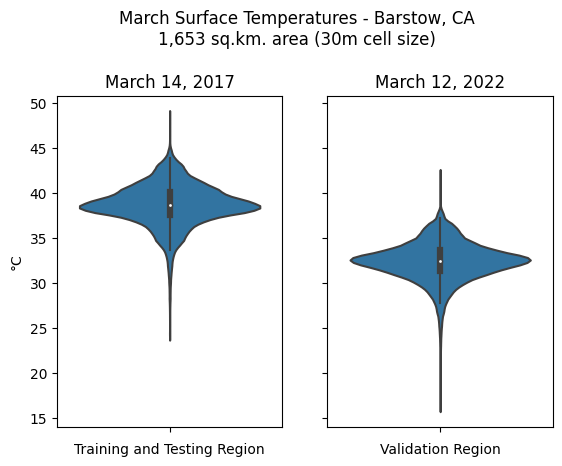

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("March Surface Temperatures - Barstow, CA\n1,653 sq.km. area (30m cell size)", y=0.98)

#Need to convert from Kelvin to Celsius
sns.violinplot(data=barstow2017, y=barstow2017['ST_B10']-273.15, ax=ax1).set(title='March 14, 2017', ylabel = '°C', xlabel = "Training and Testing Region")

sns.violinplot(data=barstow2022, y=barstow2022['ST_B10']-273.15, ax=ax2).set(title='March 12, 2022', ylabel = '', xlabel = "Validation Region")

# Three Rivers, CA

## Import Data

In [ ]:
## Import Data
#Training & Testing Data
ThreeRivers_2022 = pd.read_csv('/content/data/threerivers_2022.csv')

#Validation Data
ThreeRivers_2021 = pd.read_csv('/content/data/threerivers_2021.csv')

## EDA

### Correlation Heatmap
The correlation heatmap will show the correlation between the features in the data. This is to indicate which features should be used for the prediction (features which do not have high correlations).

Text(0.5, 1.0, '2021')

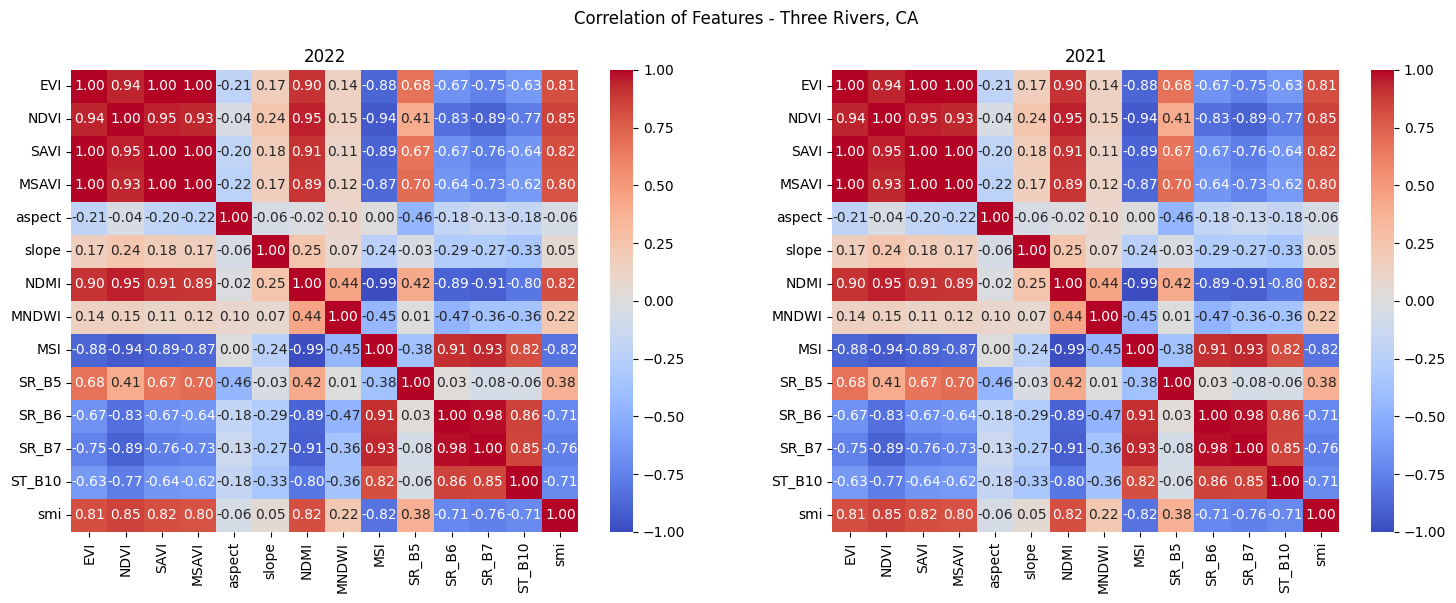

In [ ]:
#look at correlations of the data variables
#from https://sinanthahir.medium.com/experience-analysis-through-weather-data-exploratory-data-analysis-b438ceca8a9b

#features organized by land surface features
features = ['EVI','NDVI','SAVI','MSAVI','aspect','slope','NDMI','MNDWI','MSI','SR_B5','SR_B6','SR_B7','ST_B10','smi']

# assign data correlation matrix
corr_ThreeRivers_22 = ThreeRivers_2022[features].corr()
corr_ThreeRivers_21 = ThreeRivers_2022[features].corr()

#create a figure to view corr for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 6))
fig.suptitle("Correlation of Features - Three Rivers, CA")

cmap = 'coolwarm'
deci = '.2f'
fontsize = 10

sns.heatmap(data=corr_ThreeRivers_22, ax=ax1, annot=True, annot_kws={'fontsize':fontsize}, fmt=deci, cmap = cmap, vmin=-1)
ax1.set_title("2022")

sns.heatmap(data=corr_ThreeRivers_21, ax=ax2, annot=True, annot_kws={'fontsize':fontsize}, fmt=deci, cmap = cmap, vmin=-1)
ax2.set_title("2021")

The correlation matrices show that (irrespective of year) the features SR_B6,SR_B7 and ST_B10 have high negative correlation with EVI, NDVI, SAVI and MSAVI.
NDMI has high positive correlation with EVI, NDVVI, SAVI, MSAVI and high negative correlation with SR_B6, SR_B7 and ST_B10.
The features that have highest positive correlation with the target variable (smi) are EVI, NDVI, SAVI, MSAVI, whereas SR_B6, SR_B7 and ST_B10 have high negative correlation with the target variable.

### Distribution of Feature Values
This is to look at the distribution of the features and compare the feature values. This could indicate if the features require scaling or normalization.

[Text(0.5, 1.0, 'August 30, 2021'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

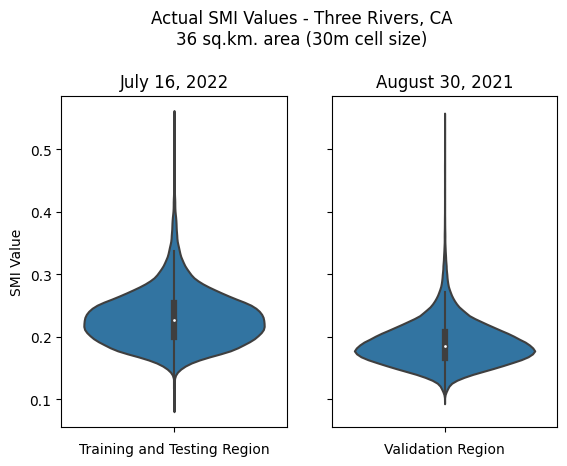

In [ ]:
#Look at distribution of actual output variable (not predicted by model)

#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("Actual SMI Values - Three Rivers, CA\n36 sq.km. area (30m cell size)", y=0.98)

sns.violinplot(data=ThreeRivers_2022, y='smi', ax=ax1).set(title='July 16, 2022', ylabel = 'SMI Value', xlabel = "Training and Testing Region")


sns.violinplot(data=ThreeRivers_2021, y='smi', ax=ax2).set(title='August 30, 2021', ylabel = '', xlabel = "Validation Region")

In [ ]:
# Input Features broken into 4 surface factors
#Vegetation Factors
vegfeat = ['EVI','NDVI','SAVI','MSAVI']
#Water Factors
watfeat = ['NDMI','MNDWI','MSI']
#Thermal Factors
thermfeat = ['SR_B5','SR_B6','SR_B7'] #not including BT_10 here due to scaling

[Text(0.5, 1.0, 'June 11, 2021'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

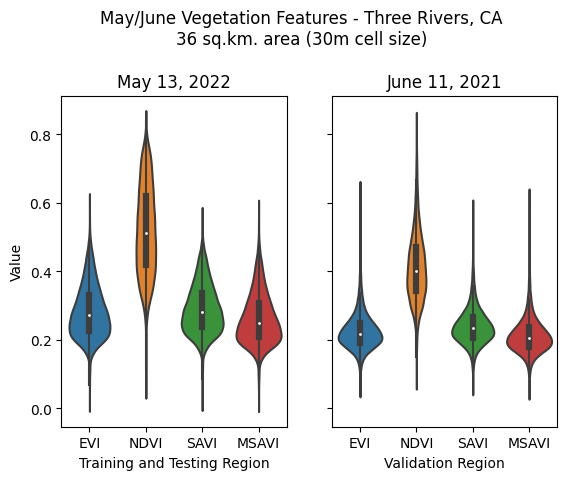

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May/June Vegetation Features - Three Rivers, CA\n36 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=ThreeRivers_2022[vegfeat], ax=ax1).set(title='May 13, 2022', ylabel = 'Value', xlabel = "Training and Testing Region")
#ax1.set_ylim(-1,1)

sns.violinplot(data=ThreeRivers_2021[vegfeat], ax=ax2).set(title='June 11, 2021', ylabel = '', xlabel = "Validation Region")
#ax2.set_ylim(-1,1)

[Text(0.5, 1.0, 'June 11, 2021'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

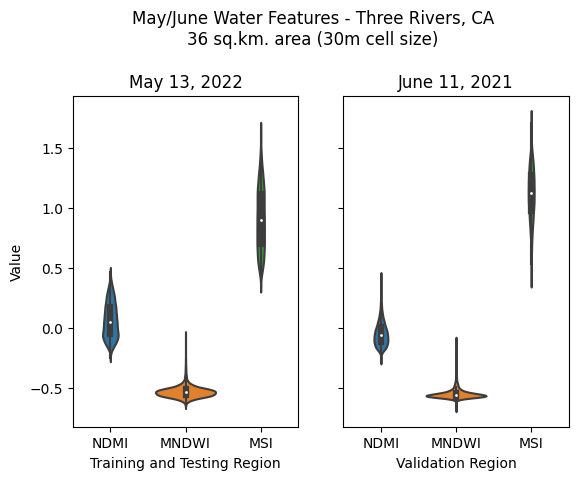

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May/June Water Features - Three Rivers, CA\n36 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=ThreeRivers_2022[watfeat], ax=ax1).set(title='May 13, 2022', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=ThreeRivers_2021[watfeat], ax=ax2).set(title='June 11, 2021', ylabel = '', xlabel = "Validation Region")

MSI values are within reasonable bounds.

[Text(0.5, 1.0, 'June 11, 2021'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

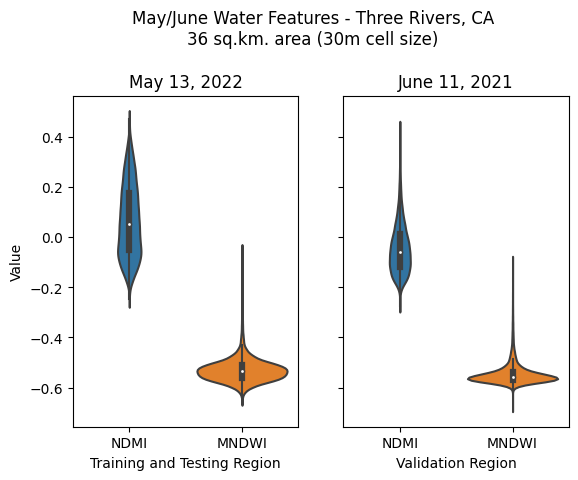

In [ ]:
#updated figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May/June Water Features - Three Rivers, CA\n36 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=ThreeRivers_2022[['NDMI', 'MNDWI']], ax=ax1).set(title='May 13, 2022', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=ThreeRivers_2021[['NDMI', 'MNDWI']], ax=ax2).set(title='June 11, 2021', ylabel = '', xlabel = "Validation Region")

[Text(0.5, 1.0, 'June 11, 2021'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

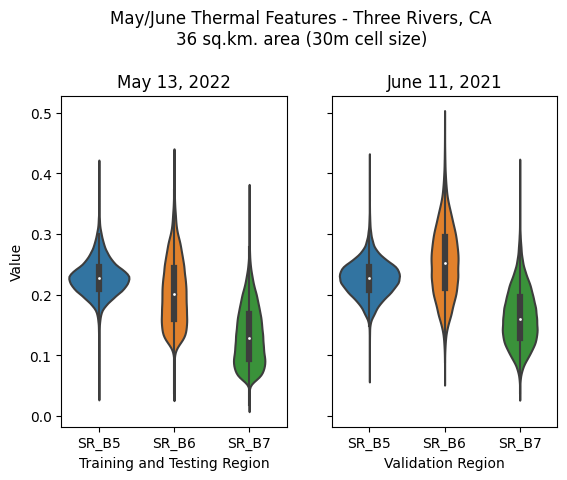

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May/June Thermal Features - Three Rivers, CA\n36 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=ThreeRivers_2022[thermfeat], ax=ax1).set(title='May 13, 2022', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=ThreeRivers_2021[thermfeat], ax=ax2).set(title='June 11, 2021', ylabel = '', xlabel = "Validation Region")

[Text(0.5, 1.0, 'June 11, 2021'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

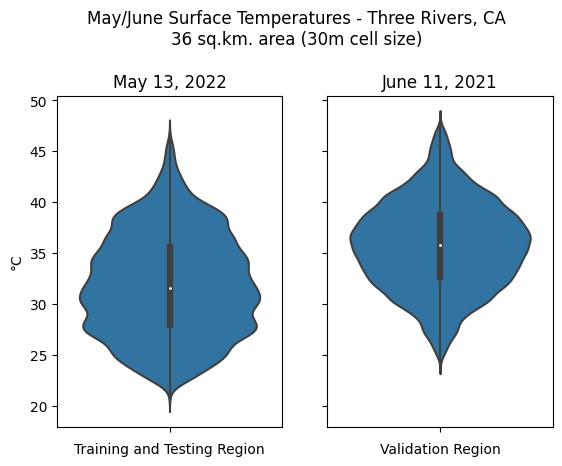

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May/June Surface Temperatures - Three Rivers, CA\n36 sq.km. area (30m cell size)", y=0.98)

#Need to convert from Kelvin to Celsius
sns.violinplot(data=ThreeRivers_2022, y=ThreeRivers_2022['ST_B10']-273.15, ax=ax1).set(title='May 13, 2022', ylabel = '°C', xlabel = "Training and Testing Region")

sns.violinplot(data=ThreeRivers_2021, y=ThreeRivers_2021['ST_B10']-273.15, ax=ax2).set(title='June 11, 2021', ylabel = '', xlabel = "Validation Region")

# Mariposa, CA

## Import Data

In [ ]:
## Import Data
#Training & Testing Data
mariposa_2021 = pd.read_csv('/content/data/mariposa_2021.csv')

#Validation Data
mariposa_2022 = pd.read_csv('/content/data/mariposa_2022.csv')

## EDA

#### Correlation Heatmap

Text(0.5, 1.0, '2022')

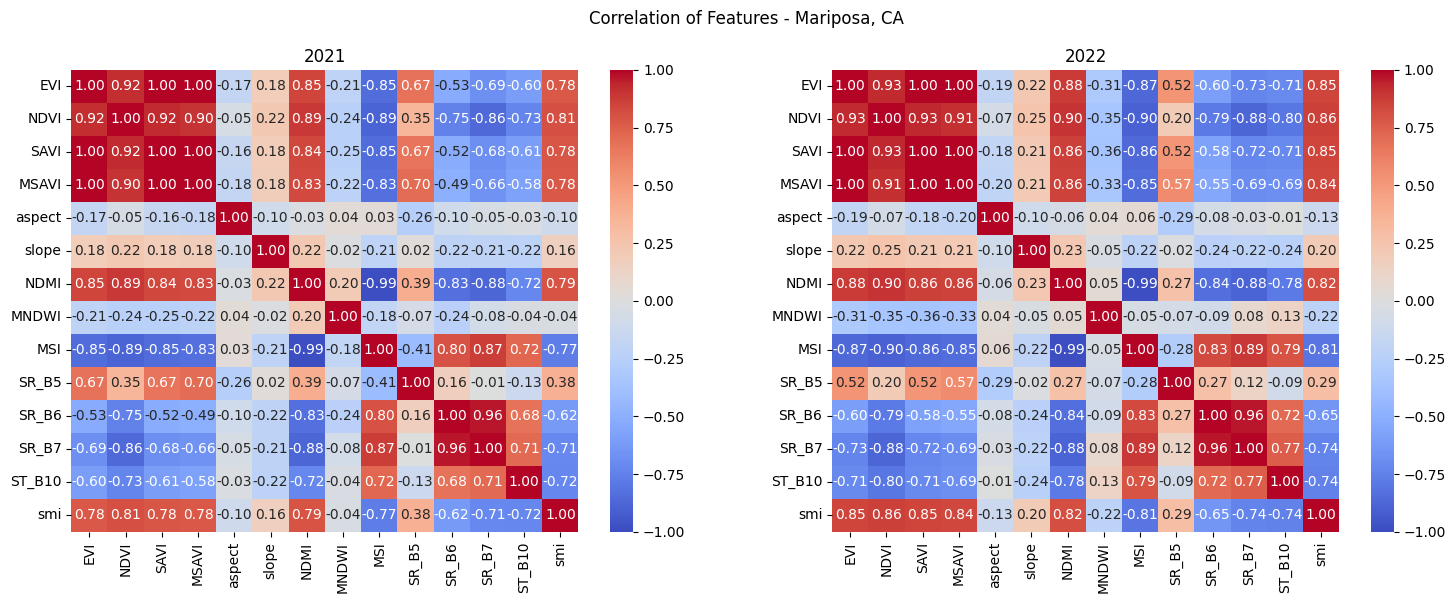

In [ ]:
#look at correlations of the data variables
#from https://sinanthahir.medium.com/experience-analysis-through-weather-data-exploratory-data-analysis-b438ceca8a9b

#features organized by land surface features
features = ['EVI','NDVI','SAVI','MSAVI','aspect','slope','NDMI','MNDWI','MSI','SR_B5','SR_B6','SR_B7','ST_B10','smi']

# assign data correlation matrix
corr_mariposa_21 = mariposa_2021[features].corr()
corr_mariposa_22 = mariposa_2022[features].corr()

#create a figure to view corr for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 6))
fig.suptitle("Correlation of Features - Mariposa, CA")

cmap = 'coolwarm'
deci = '.2f'
fontsize = 10

sns.heatmap(data=corr_mariposa_21, ax=ax1, annot=True, annot_kws={'fontsize':fontsize}, fmt=deci, cmap = cmap, vmin=-1)
ax1.set_title("2021")

sns.heatmap(data=corr_mariposa_22, ax=ax2, annot=True, annot_kws={'fontsize':fontsize}, fmt=deci, cmap = cmap, vmin=-1)
ax2.set_title("2022")

#### Distribution of Feature Values

[Text(0.5, 1.0, 'July 22, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

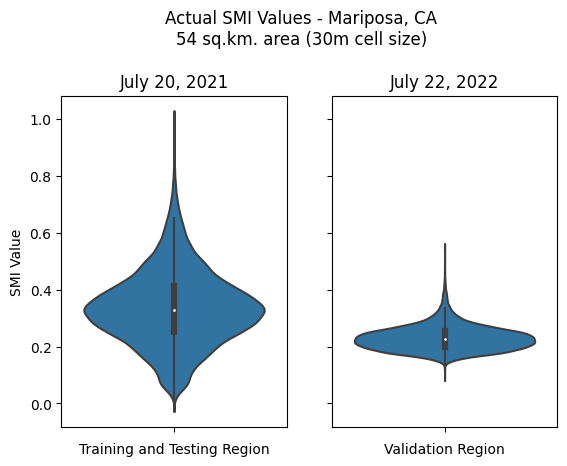

In [ ]:
#Look at distribution of actual output variable (not predicted by model)

#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("Actual SMI Values - Mariposa, CA\n54 sq.km. area (30m cell size)", y=0.98)

sns.violinplot(data=mariposa_2021, y='smi', ax=ax1).set(title='July 20, 2021', ylabel = 'SMI Value', xlabel = "Training and Testing Region")


sns.violinplot(data=ThreeRivers_2022, y='smi', ax=ax2).set(title='July 22, 2022', ylabel = '', xlabel = "Validation Region")

In [ ]:
# Input Features broken into 4 surface factors
#Vegetation Factors
vegfeat = ['EVI','NDVI','SAVI','MSAVI']
#Water Factors
watfeat = ['NDMI','MNDWI','MSI']
#Thermal Factors
thermfeat = ['SR_B5','SR_B6','SR_B7'] #not including BT_10 here due to scaling

[Text(0.5, 1.0, 'May 20, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

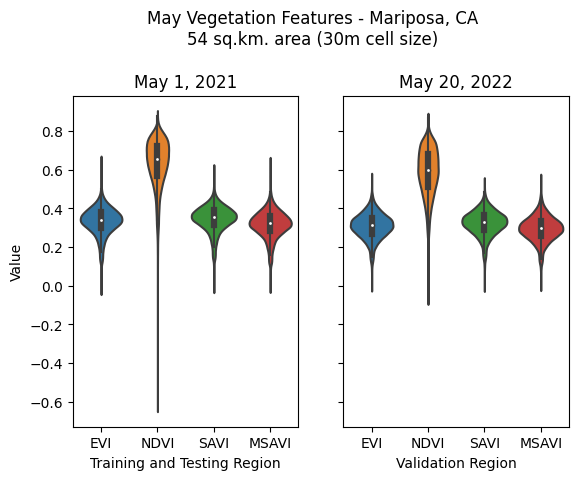

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May Vegetation Features - Mariposa, CA\n54 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=mariposa_2021[vegfeat], ax=ax1).set(title='May 1, 2021', ylabel = 'Value', xlabel = "Training and Testing Region")
#ax1.set_ylim(-1,1)

sns.violinplot(data=mariposa_2022[vegfeat], ax=ax2).set(title='May 20, 2022', ylabel = '', xlabel = "Validation Region")
#ax2.set_ylim(-1,1)

[Text(0.5, 1.0, 'May 20, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

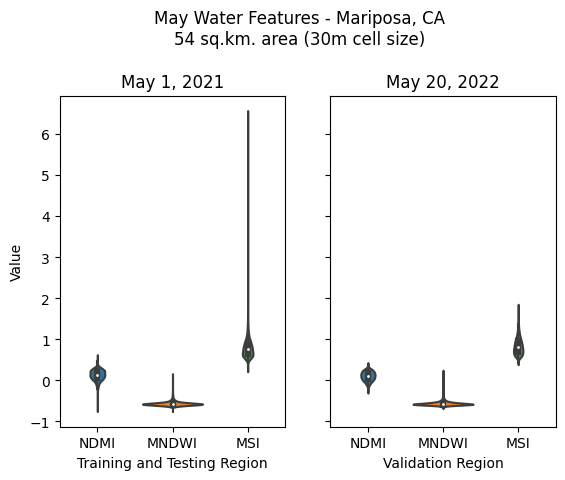

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May Water Features - Mariposa, CA\n54 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=mariposa_2021[watfeat], ax=ax1).set(title='May 1, 2021', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=mariposa_2022[watfeat], ax=ax2).set(title='May 20, 2022', ylabel = '', xlabel = "Validation Region")

MSI values are within reasonable bounds here as well.

[Text(0.5, 1.0, 'May 20, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

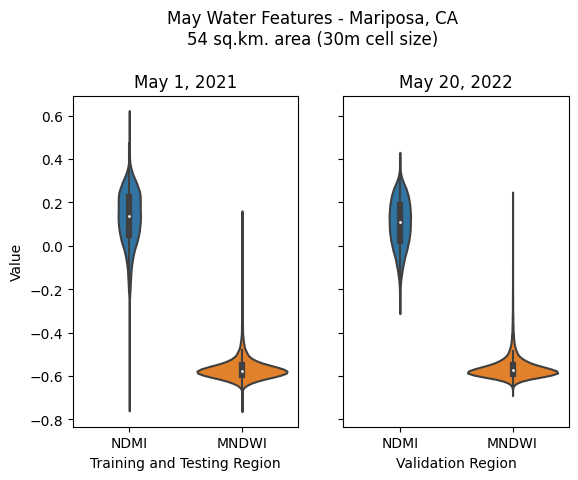

In [ ]:
#updated figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May Water Features - Mariposa, CA\n54 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=mariposa_2021[['NDMI', 'MNDWI']], ax=ax1).set(title='May 1, 2021', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=mariposa_2022[['NDMI', 'MNDWI']], ax=ax2).set(title='May 20, 2022', ylabel = '', xlabel = "Validation Region")

[Text(0.5, 1.0, 'May 20, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

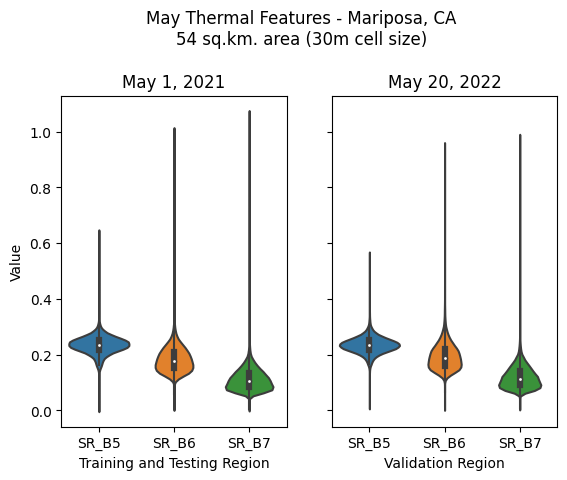

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May Thermal Features - Mariposa, CA\n54 sq.km. area (30m cell size)", y=0.98)


sns.violinplot(data=mariposa_2021[thermfeat], ax=ax1).set(title='May 1, 2021', ylabel = 'Value', xlabel = "Training and Testing Region")

sns.violinplot(data=mariposa_2022[thermfeat], ax=ax2).set(title='May 20, 2022', ylabel = '', xlabel = "Validation Region")

[Text(0.5, 1.0, 'May 20, 2022'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Validation Region')]

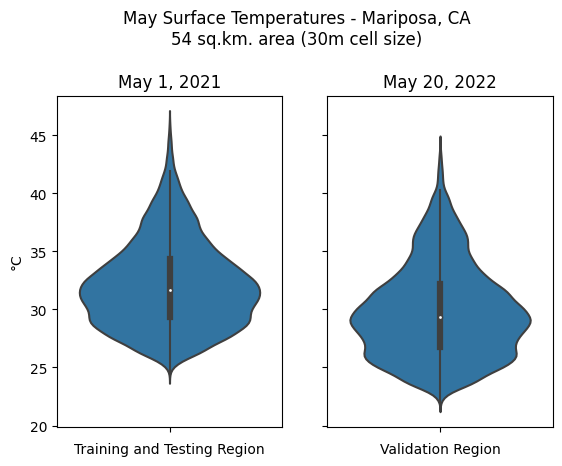

In [ ]:
#create a figure to view for each year
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(top=0.8)
fig.suptitle("May Surface Temperatures - Mariposa, CA\n54 sq.km. area (30m cell size)", y=0.98)

#Need to convert from Kelvin to Celsius
sns.violinplot(data=mariposa_2021, y=mariposa_2021['ST_B10']-273.15, ax=ax1).set(title='May 1, 2021', ylabel = '°C', xlabel = "Training and Testing Region")

sns.violinplot(data=mariposa_2022, y=mariposa_2022['ST_B10']-273.15, ax=ax2).set(title='May 20, 2022', ylabel = '', xlabel = "Validation Region")